In [1]:
import numpy as np
import matplotlib

In [2]:
# you can select an alternative theme's plot style by name
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style('grade3', grid=False, context = 'paper')
# jtplot.style('oceans16', grid=False, context = 'paper')
plt.rc('axes', axisbelow=True)

In [6]:
def cal_wave_displacement_nd_vel_linear(T,H,h):
    t=np.arange(0,6*T,.1)
    X=np.linspace(0,60,100)
    Z = np.arange(-30,1,0.1)
    x = np.tile(np.tile(X,(len(Z),1)).T,(len(t),1,1))
    z = np.tile(Z,(len(t),len(X),1))
    t = np.tile(t,(len(Z),len(X),1)).T
    a = H/2
    sigma = 2*np.pi/T

    l=9.81/(2*np.pi)*T**2
    k=sigma**2/9.81
    kb = k
    
    phi = (x*k -sigma*t)
    eta = a*np.cos(k*x-sigma*t)#+k*a**2*np.cos(2*(k*x-sigma*t))
    z=z+eta    
    D = h+np.mean(eta)  
    w = a*sigma*np.sinh(k*z+k*h)/np.sinh(k*D)*np.sin(kb*x-sigma*t)
    u = a*kb*sigma*np.cosh(k*z+k*h)/(k*np.sinh(k*D))*np.cos(kb*x-sigma*t)
    xi_h = -a*kb/k*np.cosh(k*z+k*h)/np.sinh(k*D)*np.sin(kb*x-sigma*t)
    xi_3 = a*np.sinh(k*z+k*h)/np.sinh(k*D)*np.cos(kb*x-sigma*t)
    return x,z,eta,u,w
# Write a function given u and w fields computed with function above (dims=t,x,z)
# to compute trajectory for a particle starting at x location i and depth location j
def cal_traj(i,j,x,z,u,w,dt):
    #initialize at time 0
    x_t = [x[0,i,j]] #x location of particle
    z_t = [z[0,i,j]] #z location of particle
    u_t = [u[0,i,j]] #horizontal velocity of particle
    w_t = [w[0,i,j]] #horizontal velocity of particle
    
    # loop through timesteps find new x_t and z_t given u_t and w_t, update u_t and w_t & append to lists
    # A VOUS DE JOUER
    return x_t,z_t,u_t,w_t

(300,)
(300, 100, 310) (300, 100, 310) (300, 100, 310)


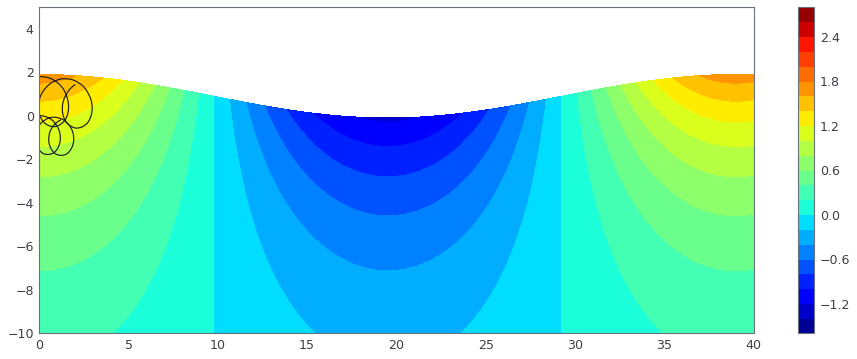

In [7]:
H = 2
T = 5
h = 25


x,z,eta,u,w = cal_wave_displacement_nd_vel_linear(T,H,h)

plt.subplots(figsize=(16,6))
plt.contourf(x[0,:,:],z[0,:,:],u[0,:,:],cmap='jet',levels=np.arange(-1.6,3,.2))
# COMPUTE AND PLOT TRAJECTORIES @ DIFFERENT LEVELS
for i in [-20,-2,]:
    x_w,z_w,u_w,w_w = cal_traj(0,i,x,z,u,w)
    plt.plot(x_w,z_w,'k')
plt.colorbar()
plt.ylim(-10,5)
plt.xlim(0,40);

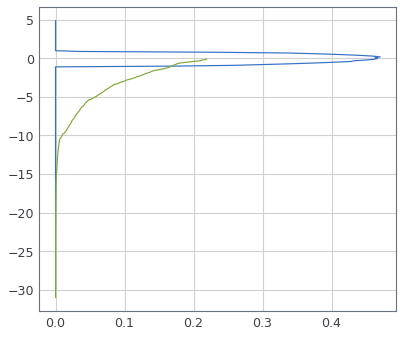

In [8]:
# COMPUTE AND PLOT LAGRANGIAN AND EULERIAN MEANS
# A VOUS DE JOUER